In [2]:
# Descriptive Analysis - Diabetes CGM Dataset

# Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
# Reading the cleaned data 
data = pd.read_csv("cleaned_df_output.csv")
# Creating a copy of the original data to work on, so that the original data is not modified
df = data.copy()

In [6]:
# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

print("=" * 80)
print("DESCRIPTIVE ANALYSIS - DIABETES CGM DATASET")
print("=" * 80)

DESCRIPTIVE ANALYSIS - DIABETES CGM DATASET


In [8]:
# Q1. How many unique patients are in the dataset and what is the average monitoring duration per patient?

print("\nQ1. How many unique patients are in the dataset and what is the average monitoring duration per patient?")
print("-" * 90)

unique_patients = df['Patient_ID'].nunique()
total_records = len(df)
avg_records_per_patient = total_records / unique_patients

# Calculate monitoring duration per patient
patient_duration = df.groupby('Patient_ID')['time'].agg(['min', 'max'])
patient_duration['duration_days'] = (patient_duration['max'] - patient_duration['min']).dt.days
avg_duration = patient_duration['duration_days'].mean()

print(f"Unique patients: {unique_patients}")
print(f"Total records: {total_records:,}")
print(f"Average records per patient: {avg_records_per_patient:.0f}")
print(f"Average monitoring duration per patient: {avg_duration:.1f} days")

print(f"\nReasoning: Understanding patient coverage and monitoring duration is crucial for assessing data quality and ")
print(f"ensuring sufficient data for analysis. With {unique_patients} patients monitored for an average of {avg_duration:.1f} days, ")
print(f"this dataset provides substantial longitudinal data for diabetes management analysis.")



Q1. How many unique patients are in the dataset and what is the average monitoring duration per patient?
------------------------------------------------------------------------------------------
Unique patients: 25
Total records: 309,392
Average records per patient: 12376
Average monitoring duration per patient: 42.5 days

Reasoning: Understanding patient coverage and monitoring duration is crucial for assessing data quality and 
ensuring sufficient data for analysis. With 25 patients monitored for an average of 42.5 days, 
this dataset provides substantial longitudinal data for diabetes management analysis.




Q2. What is the overall distribution of glucose levels across all patients?
------------------------------------------------------------------------------------------
Glucose Level Statistics (mg/dL):
count    309392.00
mean        141.43
std          57.09
min          40.00
25%          99.67
50%         132.00
75%         173.00
max         444.00
Name: glucose, dtype: float64

Glucose Range Distribution:
  Hypoglycemia: 20,377 readings (6.6%)
  Target Range: 221,892 readings (71.7%)
  Hyperglycemia: 67,123 readings (21.7%)


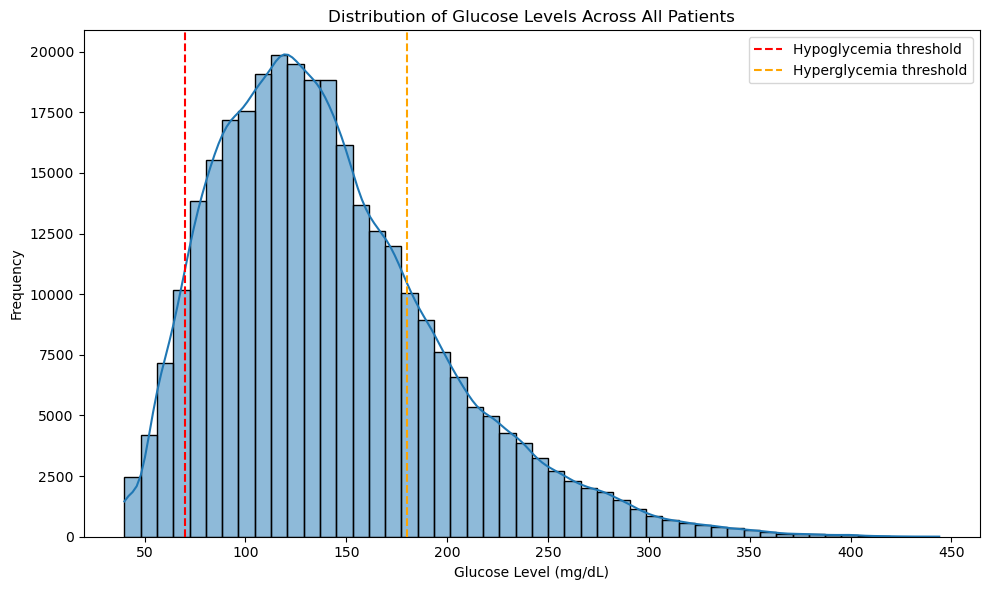


Reasoning: Glucose distribution analysis reveals glycemic control patterns. The percentage of readings in target 
range (70-180 mg/dL) indicates overall diabetes management effectiveness across the patient population.


In [10]:
# Q2. What is the overall distribution of glucose levels across all patients?

print("\n\nQ2. What is the overall distribution of glucose levels across all patients?")
print("-" * 90)

glucose_stats = df['glucose'].describe()
print("Glucose Level Statistics (mg/dL):")
print(glucose_stats.round(2))

# Categorize glucose levels
def glucose_category(glucose):
    if glucose < 70:
        return 'Hypoglycemia'
    elif 70 <= glucose <= 180:
        return 'Target Range'
    else:
        return 'Hyperglycemia'

df['glucose_category'] = df['glucose'].apply(glucose_category)
glucose_distribution = df['glucose_category'].value_counts()
glucose_percentage = (glucose_distribution / len(df) * 100).round(1)

print(f"\nGlucose Range Distribution:")
for category in ['Hypoglycemia', 'Target Range', 'Hyperglycemia']:
    if category in glucose_distribution.index:
        count = glucose_distribution[category]
        pct = glucose_percentage[category]
        print(f"  {category}: {count:,} readings ({pct}%)")

plt.figure(figsize=(10, 6))
sns.histplot(df['glucose'], bins=50, kde=True)
plt.title('Distribution of Glucose Levels Across All Patients')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.axvline(x=70, color='red', linestyle='--', label='Hypoglycemia threshold')
plt.axvline(x=180, color='orange', linestyle='--', label='Hyperglycemia threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nReasoning: Glucose distribution analysis reveals glycemic control patterns. The percentage of readings in target ")
print(f"range (70-180 mg/dL) indicates overall diabetes management effectiveness across the patient population.")




Q3. How does heart rate correlate with physical activity (steps) across patients?
------------------------------------------------------------------------------------------
Correlation between heart rate and steps: 0.573
Number of active periods (steps > 0): 90,042
Percentage of total records with activity: 29.1%

Average heart rate during activity: 88.5 bpm
Average heart rate during rest: 72.2 bpm
Heart rate increase during activity: 16.3 bpm


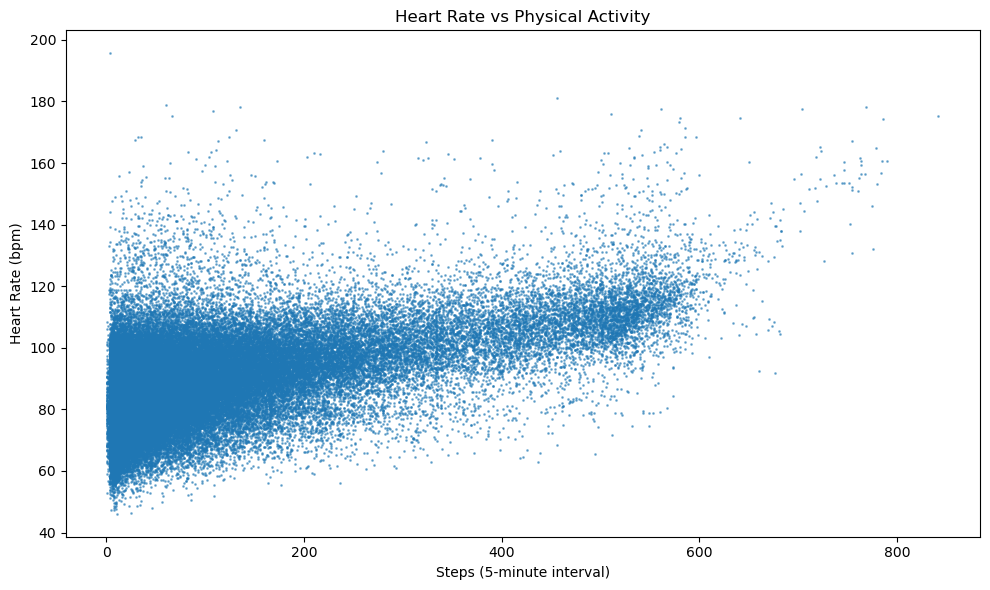


Reasoning: Understanding the relationship between heart rate and physical activity helps assess cardiovascular 
fitness and activity patterns in diabetes patients, which is crucial for comprehensive health monitoring.


In [12]:
# Q3. How does heart rate correlate with physical activity (steps) across patients?

print("\n\nQ3. How does heart rate correlate with physical activity (steps) across patients?")
print("-" * 90)

# Remove zero steps for correlation analysis
active_data = df[df['steps'] > 0].copy()
correlation = active_data['heart_rate'].corr(active_data['steps'])

print(f"Correlation between heart rate and steps: {correlation:.3f}")
print(f"Number of active periods (steps > 0): {len(active_data):,}")
print(f"Percentage of total records with activity: {len(active_data)/len(df)*100:.1f}%")

# Heart rate stats during activity vs rest
hr_active = active_data['heart_rate'].mean()
hr_rest = df[df['steps'] == 0]['heart_rate'].mean()

print(f"\nAverage heart rate during activity: {hr_active:.1f} bpm")
print(f"Average heart rate during rest: {hr_rest:.1f} bpm")
print(f"Heart rate increase during activity: {hr_active - hr_rest:.1f} bpm")

plt.figure(figsize=(10, 6))
plt.scatter(active_data['steps'], active_data['heart_rate'], alpha=0.5, s=1)
plt.xlabel('Steps (5-minute interval)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate vs Physical Activity')
plt.tight_layout()
plt.show()

print(f"\nReasoning: Understanding the relationship between heart rate and physical activity helps assess cardiovascular ")
print(f"fitness and activity patterns in diabetes patients, which is crucial for comprehensive health monitoring.")


In [34]:
# Q4. What are the patterns of insulin delivery (basal vs bolus) across patients?

print("\n\nQ4. What are the patterns of insulin delivery (basal vs bolus) across patients?")
print("-" * 90)

# Calculate total insulin delivery
df['total_insulin'] = df['basal_rate'] + df['bolus_volume_delivered']

# Summary statistics
basal_stats = df['basal_rate'].describe()
bolus_stats = df['bolus_volume_delivered'].describe()
total_insulin_stats = df['total_insulin'].describe()

print("Basal Rate Statistics (units/hour):")
print(basal_stats.round(4))
print(f"\nBolus Volume Statistics (units):")
print(bolus_stats.round(4))

# Calculate percentage of records with bolus delivery
bolus_deliveries = (df['bolus_volume_delivered'] > 0).sum()
bolus_percentage = (bolus_deliveries / len(df) * 100)

print(f"\nInsulin Delivery Patterns:")
print(f"  Records with bolus delivery: {bolus_deliveries:,} ({bolus_percentage:.2f}%)")
print(f"  Average bolus when delivered: {df[df['bolus_volume_delivered'] > 0]['bolus_volume_delivered'].mean():.3f} units")

# Patient-level insulin patterns
patient_insulin = df.groupby('Patient_ID').agg({
    'basal_rate': 'mean',
    'bolus_volume_delivered': ['sum', 'count'],
    'total_insulin': 'mean'
}).round(3)

# Flatten column names for easier access
patient_insulin.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in patient_insulin.columns]

print(f"\nAverage daily insulin patterns per patient:")
print(f"  Mean basal rate: {patient_insulin['basal_rate_mean'].mean():.3f} ± {patient_insulin['basal_rate_mean'].std():.3f} units/hour")
print(f"  Average total daily bolus: {patient_insulin['bolus_volume_delivered_sum'].mean():.2f} units/day")

print(f"\nReasoning: Insulin delivery patterns provide insights into diabetes management strategies. The ratio of basal ")
print(f"to bolus insulin and frequency of bolus deliveries indicate patient adherence and glycemic control approach.")




Q4. What are the patterns of insulin delivery (basal vs bolus) across patients?
------------------------------------------------------------------------------------------
Basal Rate Statistics (units/hour):
count    309392.0000
mean          0.0413
std           0.0361
min           0.0000
25%           0.0000
50%           0.0560
75%           0.0660
max           0.2500
Name: basal_rate, dtype: float64

Bolus Volume Statistics (units):
count    309392.0000
mean          0.0661
std           0.7550
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max          19.8000
Name: bolus_volume_delivered, dtype: float64

Insulin Delivery Patterns:
  Records with bolus delivery: 3,591 (1.16%)
  Average bolus when delivered: 5.693 units

Average daily insulin patterns per patient:
  Mean basal rate: 0.053 ± 0.034 units/hour
  Average total daily bolus: 817.75 units/day

Reasoning: Insulin delivery patterns provide insights into diabetes management strategies.



Q5. How do carbohydrate inputs relate to bolus insulin deliveries?
------------------------------------------------------------------------------------------
Correlation between carb input and bolus delivery: 0.170

Carbohydrate and Insulin Patterns:
  Records with carb input: 2,646 (0.86%)
  Records with bolus delivery: 3,591
  Average carb input (when recorded): 6.2g
  Average insulin-to-carb ratio: 1 unit per 0.6g carbs


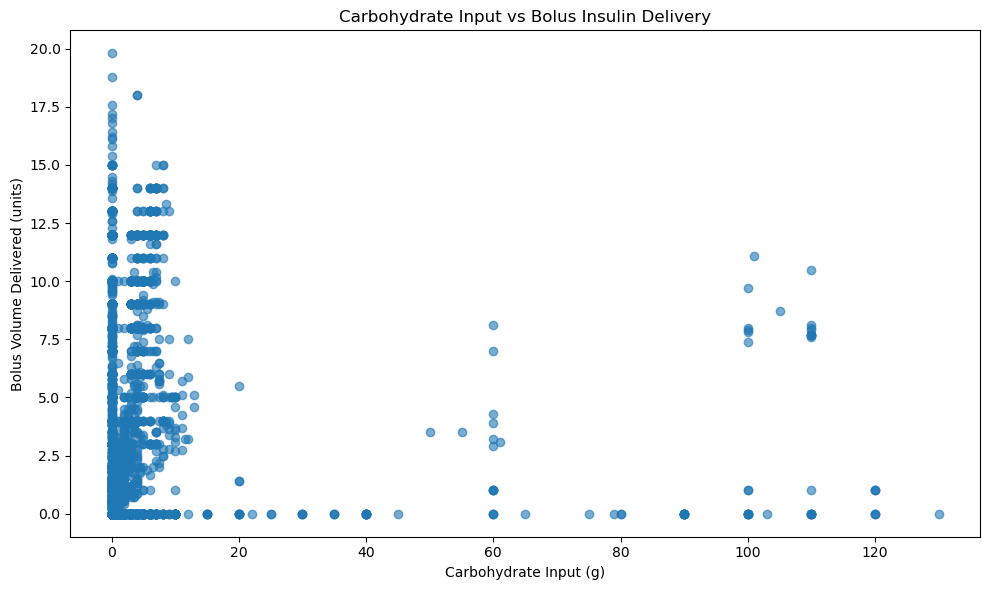


Reasoning: The relationship between carb inputs and bolus deliveries indicates how well patients are 
practicing carb counting and appropriate insulin dosing, which is fundamental to effective diabetes management.


In [36]:
# Q5. How do carbohydrate inputs relate to bolus insulin deliveries?

print("\n\nQ5. How do carbohydrate inputs relate to bolus insulin deliveries?")
print("-" * 90)

# Filter records with carb inputs or bolus deliveries
carb_bolus_data = df[(df['carb_input'] > 0) | (df['bolus_volume_delivered'] > 0)].copy()

# Calculate correlation
carb_bolus_corr = df['carb_input'].corr(df['bolus_volume_delivered'])
print(f"Correlation between carb input and bolus delivery: {carb_bolus_corr:.3f}")

# Carb counting patterns
carb_entries = (df['carb_input'] > 0).sum()
carb_percentage = (carb_entries / len(df) * 100)
bolus_entries = (df['bolus_volume_delivered'] > 0).sum()

print(f"\nCarbohydrate and Insulin Patterns:")
print(f"  Records with carb input: {carb_entries:,} ({carb_percentage:.2f}%)")
print(f"  Records with bolus delivery: {bolus_entries:,}")
print(f"  Average carb input (when recorded): {df[df['carb_input'] > 0]['carb_input'].mean():.1f}g")

# Insulin-to-carb ratio analysis
paired_data = df[(df['carb_input'] > 0) & (df['bolus_volume_delivered'] > 0)].copy()
if len(paired_data) > 0:
    paired_data['insulin_carb_ratio'] = paired_data['bolus_volume_delivered'] / paired_data['carb_input']
    avg_ratio = paired_data['insulin_carb_ratio'].mean()
    print(f"  Average insulin-to-carb ratio: 1 unit per {1/avg_ratio:.1f}g carbs")

plt.figure(figsize=(10, 6))
plt.scatter(df['carb_input'], df['bolus_volume_delivered'], alpha=0.6)
plt.xlabel('Carbohydrate Input (g)')
plt.ylabel('Bolus Volume Delivered (units)')
plt.title('Carbohydrate Input vs Bolus Insulin Delivery')
plt.tight_layout()
plt.show()

print(f"\nReasoning: The relationship between carb inputs and bolus deliveries indicates how well patients are ")
print(f"practicing carb counting and appropriate insulin dosing, which is fundamental to effective diabetes management.")




Q6. What is the distribution of calorie expenditure and how does it vary throughout the day?
------------------------------------------------------------------------------------------
Calorie Expenditure Statistics (calories/5-min interval):
count    309392.00
mean          8.81
std           6.93
min           0.00
25%           5.85
50%           6.28
75%           9.19
max         106.35
Name: calories, dtype: float64

Daily Calorie Expenditure Pattern:
  Peak calorie burn: 11.71 calories/5-min at 19:00
  Lowest calorie burn: 5.58 calories/5-min at 5:00
  Average daily calorie expenditure: 2495 calories/day


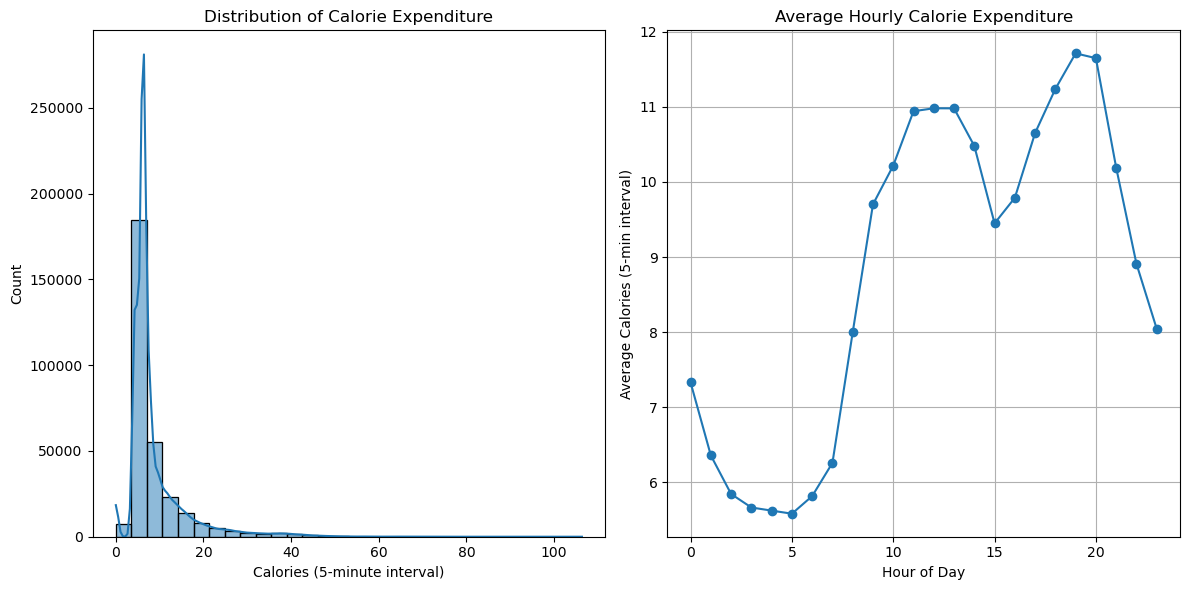


Reasoning: Calorie expenditure patterns reveal daily activity rhythms and metabolic patterns, helping 
understand energy balance in diabetes patients and optimize meal timing and insulin delivery.


In [18]:
# Q6. What is the distribution of calorie expenditure and how does it vary throughout the day?

print("\n\nQ6. What is the distribution of calorie expenditure and how does it vary throughout the day?")
print("-" * 90)

calorie_stats = df['calories'].describe()
print("Calorie Expenditure Statistics (calories/5-min interval):")
print(calorie_stats.round(2))

# Extract hour from time for hourly analysis
df['hour'] = df['time'].dt.hour
hourly_calories = df.groupby('hour')['calories'].mean()

print(f"\nDaily Calorie Expenditure Pattern:")
peak_hour = hourly_calories.idxmax()
lowest_hour = hourly_calories.idxmin()
print(f"  Peak calorie burn: {hourly_calories.max():.2f} calories/5-min at {peak_hour}:00")
print(f"  Lowest calorie burn: {hourly_calories.min():.2f} calories/5-min at {lowest_hour}:00")

# Calculate daily totals
df['date'] = df['time'].dt.date
daily_calories = df.groupby(['Patient_ID', 'date'])['calories'].sum()
avg_daily_calories = daily_calories.mean()

print(f"  Average daily calorie expenditure: {avg_daily_calories:.0f} calories/day")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calorie Expenditure')
plt.xlabel('Calories (5-minute interval)')

plt.subplot(1, 2, 2)
hourly_calories.plot(kind='line', marker='o')
plt.title('Average Hourly Calorie Expenditure')
plt.xlabel('Hour of Day')
plt.ylabel('Average Calories (5-min interval)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nReasoning: Calorie expenditure patterns reveal daily activity rhythms and metabolic patterns, helping ")
print(f"understand energy balance in diabetes patients and optimize meal timing and insulin delivery.")




Q7. How stable are glucose levels across different patients (glycemic variability)?
------------------------------------------------------------------------------------------
Glycemic Variability Summary:
  Average glucose across all patients: 155.3 ± 26.1 mg/dL
  Average coefficient of variation: 39.6% ± 7.3%
  Average glucose range per patient: 320.2 mg/dL

Glycemic Control Distribution:
  Poor Control: 9 patients (36.0%)
  Good Control: 9 patients (36.0%)
  Excellent Control: 7 patients (28.0%)


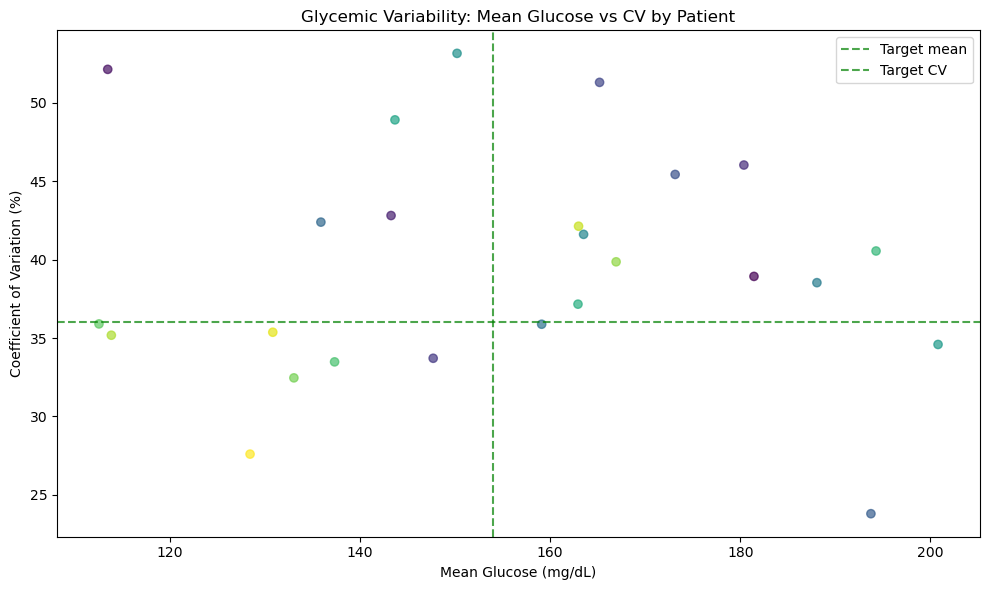


Reasoning: Glycemic variability assessment helps identify patients with unstable glucose control. 
High variability indicates increased risk of complications and need for treatment optimization.


In [20]:
# Q7. How stable are glucose levels across different patients (glycemic variability)?

print("\n\nQ7. How stable are glucose levels across different patients (glycemic variability)?")
print("-" * 90)

# Calculate glycemic variability metrics per patient
patient_variability = df.groupby('Patient_ID')['glucose'].agg([
    'mean', 'std', 'min', 'max'
]).round(2)

patient_variability['cv'] = (patient_variability['std'] / patient_variability['mean'] * 100).round(2)
patient_variability['glucose_range'] = patient_variability['max'] - patient_variability['min']

print("Glycemic Variability Summary:")
print(f"  Average glucose across all patients: {patient_variability['mean'].mean():.1f} ± {patient_variability['mean'].std():.1f} mg/dL")
print(f"  Average coefficient of variation: {patient_variability['cv'].mean():.1f}% ± {patient_variability['cv'].std():.1f}%")
print(f"  Average glucose range per patient: {patient_variability['glucose_range'].mean():.1f} mg/dL")

# Categorize patients by glycemic control
def glycemic_control_category(mean_glucose, cv):
    if mean_glucose <= 154 and cv <= 36:
        return 'Excellent Control'
    elif mean_glucose <= 180 and cv <= 50:
        return 'Good Control'
    else:
        return 'Poor Control'

patient_variability['control_category'] = patient_variability.apply(
    lambda x: glycemic_control_category(x['mean'], x['cv']), axis=1
)

control_distribution = patient_variability['control_category'].value_counts()
print(f"\nGlycemic Control Distribution:")
for category, count in control_distribution.items():
    percentage = (count / len(patient_variability) * 100)
    print(f"  {category}: {count} patients ({percentage:.1f}%)")

plt.figure(figsize=(10, 6))
plt.scatter(patient_variability['mean'], patient_variability['cv'], 
           c=patient_variability.index.factorize()[0], alpha=0.7)
plt.xlabel('Mean Glucose (mg/dL)')
plt.ylabel('Coefficient of Variation (%)')
plt.title('Glycemic Variability: Mean Glucose vs CV by Patient')
plt.axvline(x=154, color='green', linestyle='--', alpha=0.7, label='Target mean')
plt.axhline(y=36, color='green', linestyle='--', alpha=0.7, label='Target CV')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nReasoning: Glycemic variability assessment helps identify patients with unstable glucose control. ")
print(f"High variability indicates increased risk of complications and need for treatment optimization.")




Q8. What are the patterns of glucose excursions (time in range analysis)?
------------------------------------------------------------------------------------------
Time in Range Analysis:
  Very Low (<54): 4,628 readings (1.5%)
  Low (54-69): 15,749 readings (5.1%)
  Target (70-180): 221,892 readings (71.7%)
  High (181-250): 51,245 readings (16.6%)
  Very High (>250): 15,878 readings (5.1%)

Patient-Level Time in Range:
  Average time in target range per patient: 60.7%
  Patients with >70% time in range: 8 (32.0%)


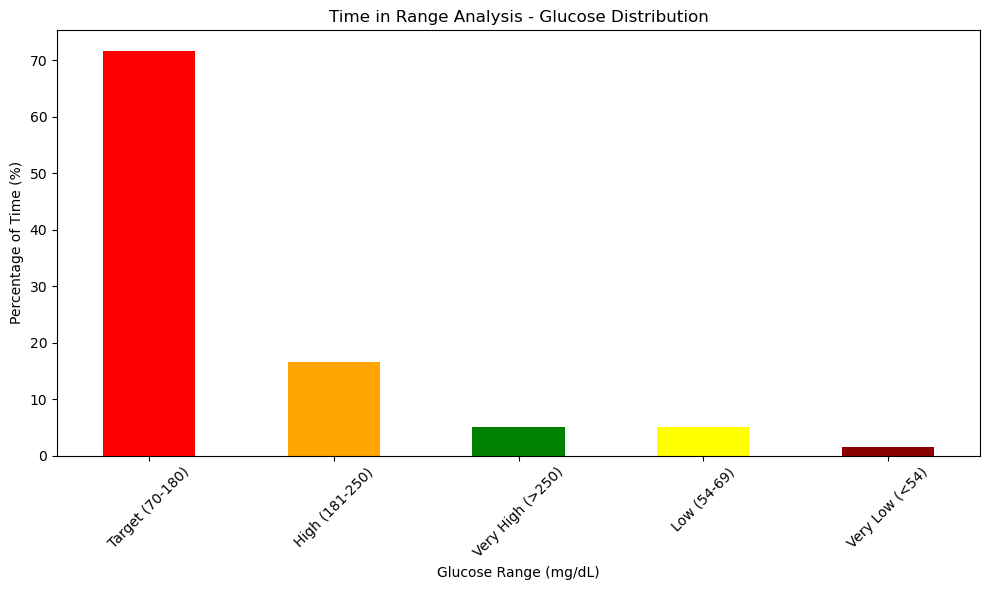


Reasoning: Time in range analysis is the gold standard for assessing glycemic control quality. 
Target is >70% time in range (70-180 mg/dL) with <4% time below 70 mg/dL.


In [22]:
# Q8. What are the patterns of glucose excursions (time in range analysis)?

print("\n\nQ8. What are the patterns of glucose excursions (time in range analysis)?")
print("-" * 90)

# Define glucose ranges
def glucose_range_category(glucose):
    if glucose < 54:
        return 'Very Low (<54)'
    elif glucose < 70:
        return 'Low (54-69)'
    elif glucose <= 180:
        return 'Target (70-180)'
    elif glucose <= 250:
        return 'High (181-250)'
    else:
        return 'Very High (>250)'

df['glucose_range'] = df['glucose'].apply(glucose_range_category)
time_in_range = df['glucose_range'].value_counts()
time_in_range_pct = (time_in_range / len(df) * 100).round(1)

print("Time in Range Analysis:")
for range_name in ['Very Low (<54)', 'Low (54-69)', 'Target (70-180)', 'High (181-250)', 'Very High (>250)']:
    if range_name in time_in_range.index:
        count = time_in_range[range_name]
        pct = time_in_range_pct[range_name]
        print(f"  {range_name}: {count:,} readings ({pct}%)")

# Patient-level time in range
patient_tir = df.groupby('Patient_ID')['glucose_range'].value_counts(normalize=True).unstack(fill_value=0) * 100
target_range_patients = patient_tir['Target (70-180)'] if 'Target (70-180)' in patient_tir.columns else 0

print(f"\nPatient-Level Time in Range:")
if hasattr(target_range_patients, 'mean'):
    print(f"  Average time in target range per patient: {target_range_patients.mean():.1f}%")
    print(f"  Patients with >70% time in range: {(target_range_patients > 70).sum()} ({(target_range_patients > 70).mean()*100:.1f}%)")

plt.figure(figsize=(10, 6))
time_in_range_pct.plot(kind='bar', color=['red', 'orange', 'green', 'yellow', 'darkred'])
plt.title('Time in Range Analysis - Glucose Distribution')
plt.xlabel('Glucose Range (mg/dL)')
plt.ylabel('Percentage of Time (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nReasoning: Time in range analysis is the gold standard for assessing glycemic control quality. ")
print(f"Target is >70% time in range (70-180 mg/dL) with <4% time below 70 mg/dL.")




Q9. How do weekend vs weekday patterns differ in glucose control and activity?
------------------------------------------------------------------------------------------
Glucose Control by Day Type:
            mean    std
day_type               
Weekday   141.06  56.32
Weekend   142.32  58.94

Activity Patterns by Day Type:
              steps        calories heart_rate
                sum   mean     mean       mean
day_type                                      
Weekday   6790825.0  30.80     8.84      76.95
Weekend   2746185.0  30.88     8.76      77.08

Time in Range by Day Type:

Weekday:
  Target (70-180): 72.3%
  Low (54-69): 5.0%
  High (181-250): 16.4%

Weekend:
  Target (70-180): 70.4%
  Low (54-69): 5.2%
  High (181-250): 17.0%


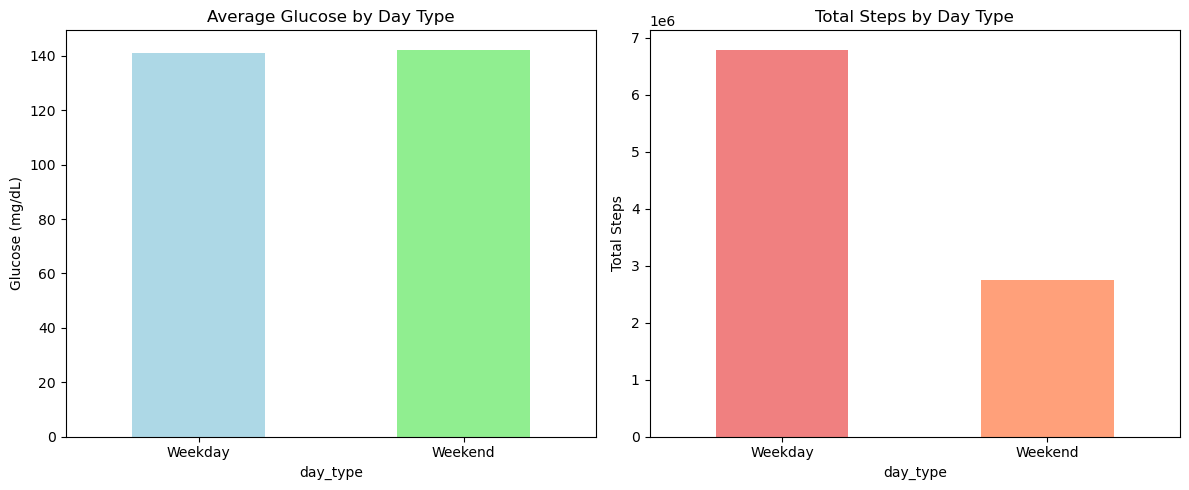


Reasoning: Weekend vs weekday patterns reveal lifestyle impacts on diabetes management. Differences 
in activity, meal timing, and sleep patterns can significantly affect glucose control.


In [24]:
# Q9. How do weekend vs weekday patterns differ in glucose control and activity?

print("\n\nQ9. How do weekend vs weekday patterns differ in glucose control and activity?")
print("-" * 90)

df['day_of_week'] = df['time'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # Saturday, Sunday
df['day_type'] = df['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Compare glucose control
glucose_by_day_type = df.groupby('day_type')['glucose'].agg(['mean', 'std']).round(2)
print("Glucose Control by Day Type:")
print(glucose_by_day_type)

# Compare activity levels
activity_by_day_type = df.groupby('day_type').agg({
    'steps': ['sum', 'mean'],
    'calories': 'mean',
    'heart_rate': 'mean'
}).round(2)

print(f"\nActivity Patterns by Day Type:")
print(activity_by_day_type)

# Time in range by day type
tir_by_day_type = df.groupby('day_type')['glucose_range'].value_counts(normalize=True) * 100
print(f"\nTime in Range by Day Type:")
for day_type in ['Weekday', 'Weekend']:
    print(f"\n{day_type}:")
    day_data = tir_by_day_type[day_type] if day_type in tir_by_day_type.index else {}
    for range_name in ['Target (70-180)', 'Low (54-69)', 'High (181-250)']:
        if range_name in day_data.index:
            print(f"  {range_name}: {day_data[range_name]:.1f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df.groupby('day_type')['glucose'].mean().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Glucose by Day Type')
plt.ylabel('Glucose (mg/dL)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df.groupby('day_type')['steps'].sum().plot(kind='bar', color=['lightcoral', 'lightsalmon'])
plt.title('Total Steps by Day Type')
plt.ylabel('Total Steps')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nReasoning: Weekend vs weekday patterns reveal lifestyle impacts on diabetes management. Differences ")
print(f"in activity, meal timing, and sleep patterns can significantly affect glucose control.")




Q10. What are the trends in glucose levels before and after meal periods (carb input events)?
------------------------------------------------------------------------------------------
Total meal events identified: 2646

Meal-Related Glucose Analysis (n=2637 meal events):
  Average pre-meal glucose: 128.4 mg/dL
  Average post-meal glucose: 135.5 mg/dL
  Average glucose excursion: 7.1 mg/dL
  Average carbohydrate intake: 6.2g
  Correlation (carbs vs glucose excursion): 0.007


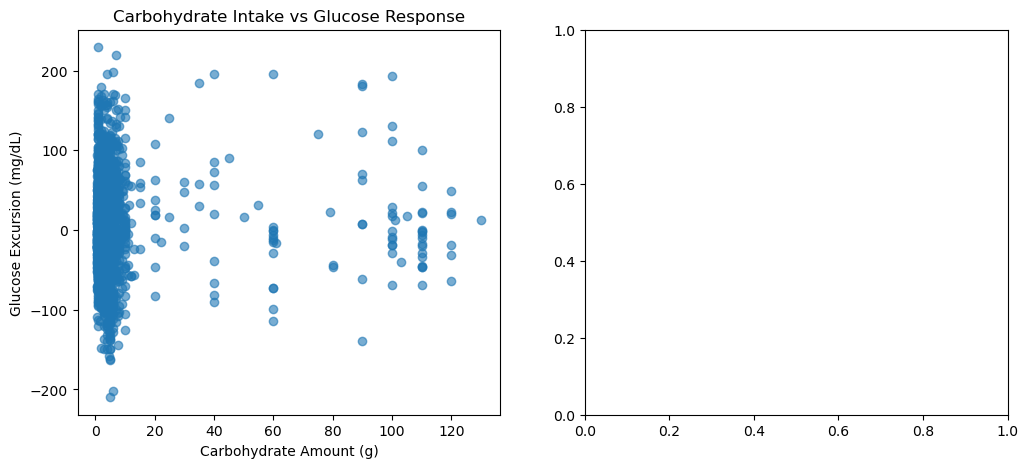

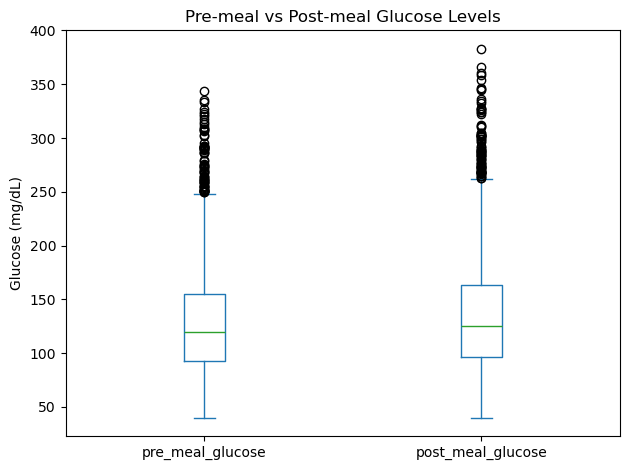


Reasoning: Analyzing glucose responses to meals helps understand postprandial glucose management. 
The relationship between carb intake and glucose excursions indicates the effectiveness of 
insulin dosing and carb counting practices.

ANALYSIS COMPLETE


In [26]:
# Q10. What are the trends in glucose levels before and after meal periods (carb input events)?

print("\n\nQ10. What are the trends in glucose levels before and after meal periods (carb input events)?")
print("-" * 90)

# Identify meal events (carb input > 0)
meal_events = df[df['carb_input'] > 0].copy()
print(f"Total meal events identified: {len(meal_events)}")

if len(meal_events) > 0:
    # Analyze glucose trends around meals
    meal_glucose_analysis = []
    
    for idx, meal in meal_events.iterrows():
        patient_id = meal['Patient_ID']
        meal_time = meal['time']
        
        # Get patient data around meal time (±2 hours)
        patient_data = df[df['Patient_ID'] == patient_id].copy()
        patient_data = patient_data.set_index('time').sort_index()
        
        try:
            # Pre-meal glucose (30-60 minutes before)
            pre_meal_start = meal_time - pd.Timedelta(hours=1)
            pre_meal_end = meal_time - pd.Timedelta(minutes=30)
            pre_meal_glucose = patient_data.loc[pre_meal_start:pre_meal_end, 'glucose'].mean()
            
            # Post-meal glucose (60-120 minutes after)
            post_meal_start = meal_time + pd.Timedelta(hours=1)
            post_meal_end = meal_time + pd.Timedelta(hours=2)
            post_meal_glucose = patient_data.loc[post_meal_start:post_meal_end, 'glucose'].mean()
            
            if not pd.isna(pre_meal_glucose) and not pd.isna(post_meal_glucose):
                meal_glucose_analysis.append({
                    'pre_meal_glucose': pre_meal_glucose,
                    'post_meal_glucose': post_meal_glucose,
                    'glucose_excursion': post_meal_glucose - pre_meal_glucose,
                    'carb_amount': meal['carb_input']
                })
        except:
            continue
    
    if meal_glucose_analysis:
        meal_df = pd.DataFrame(meal_glucose_analysis)
        
        print(f"\nMeal-Related Glucose Analysis (n={len(meal_df)} meal events):")
        print(f"  Average pre-meal glucose: {meal_df['pre_meal_glucose'].mean():.1f} mg/dL")
        print(f"  Average post-meal glucose: {meal_df['post_meal_glucose'].mean():.1f} mg/dL")
        print(f"  Average glucose excursion: {meal_df['glucose_excursion'].mean():.1f} mg/dL")
        print(f"  Average carbohydrate intake: {meal_df['carb_amount'].mean():.1f}g")
        
        # Correlation between carb amount and glucose excursion
        carb_excursion_corr = meal_df['carb_amount'].corr(meal_df['glucose_excursion'])
        print(f"  Correlation (carbs vs glucose excursion): {carb_excursion_corr:.3f}")
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(meal_df['carb_amount'], meal_df['glucose_excursion'], alpha=0.6)
        plt.xlabel('Carbohydrate Amount (g)')
        plt.ylabel('Glucose Excursion (mg/dL)')
        plt.title('Carbohydrate Intake vs Glucose Response')
        
        plt.subplot(1, 2, 2)
        meal_df[['pre_meal_glucose', 'post_meal_glucose']].plot(kind='box')
        plt.title('Pre-meal vs Post-meal Glucose Levels')
        plt.ylabel('Glucose (mg/dL)')
        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient data for meal-related glucose analysis.")
        
    print(f"\nReasoning: Analyzing glucose responses to meals helps understand postprandial glucose management. ")
    print(f"The relationship between carb intake and glucose excursions indicates the effectiveness of ")
    print(f"insulin dosing and carb counting practices.")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)